# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []
city_names = []
fullset = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for c, lat_lng in enumerate(lat_lngs):
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    city = city.title()
    
    # If the city is unique, then add it to a our cities list
    if city not in cities and pd.notnull(city):
        cities.append(city)
        city_names.append(city)
        fullset.append(c)
        
# Reduce the lat/longs using the fullset list
lats = [lats[c] for c in fullset]
lngs = [lngs[c] for c in fullset]

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 616


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        
    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q="
      
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lon = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lon, 
                          "Max Temp (F)": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | Xilin Hot
Processing Record 2 of Set 1 | Tolanaro
Processing Record 3 of Set 1 | Margaret River
Processing Record 4 of Set 1 | Papatowai
Processing Record 5 of Set 1 | Rongelap
Processing Record 6 of Set 1 | Fale Old Settlement
Processing Record 7 of Set 1 | Qaqortoq
Processing Record 8 of Set 1 | Lebu
Processing Record 9 of Set 1 | Grytviken
Processing Record 10 of Set 1 | College
Processing Record 11 of Set 1 | Blackmans Bay
Processing Record 12 of Set 1 | Buala
Processing Record 13 of Set 1 | Whitehorse
Processing Record 14 of Set 1 | Solleftea
Processing Record 15 of Set 1 | Anadyr
Processing Record 16 of Set 1 | Sisimiut
Processing Record 17 of Set 1 | Bargara
City not found. Skipping...
Processing Record 18 of Set 1 | Carpi Centro
Processing Record 19 of Set 1 | Yellowknife
Processing Record 20 of Set 1 | Kudahuvadhoo
Processing Record 21 of Set 1 | Albany
Processing Record 22 of Set 1 | Ba

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City            592
Lat             592
Lng             592
Max Temp (F)    592
Humidity        592
Cloudiness      592
Wind Speed      592
Country         592
Date            592
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp (F),Humidity,Cloudiness,Wind Speed,Country,Date
0,Xilin Hot,43.9667,116.0333,64.15,35,21,8.75,CN,1685078691
1,Tolanaro,-25.0319,46.9987,69.87,83,75,9.22,MG,1685078692
2,Margaret River,-33.9500,115.0667,59.74,47,0,2.57,AU,1685078692
3,Papatowai,-46.5619,169.4708,57.65,67,90,17.20,NZ,1685078692
4,Rongelap,11.1635,166.8941,82.27,79,100,19.82,MH,1685078692


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp (F),Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Xilin Hot,43.9667,116.0333,64.15,35,21,8.75,CN,1685078691
1,Tolanaro,-25.0319,46.9987,69.87,83,75,9.22,MG,1685078692
2,Margaret River,-33.9500,115.0667,59.74,47,0,2.57,AU,1685078692
3,Papatowai,-46.5619,169.4708,57.65,67,90,17.20,NZ,1685078692
4,Rongelap,11.1635,166.8941,82.27,79,100,19.82,MH,1685078692


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

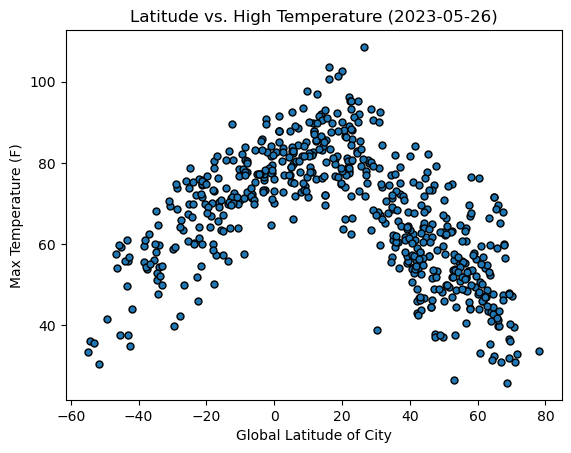

In [8]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"].astype("float")
y_values = city_data_df["Max Temp (F)"].astype("float")
plt.scatter(x_values,y_values, c='C0', s=25, edgecolors='0.0')

# Get the date from the dataframe
date_unix = city_data_df["Date"].iloc[1]
date = pd.to_datetime(date_unix, unit='s').strftime('%Y-%m-%d')

# Incorporate the other graph properties
plt.xlabel('Global Latitude of City')
plt.ylabel('Max Temperature (F)')
plt.title(f'Latitude vs. High Temperature ({date})')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

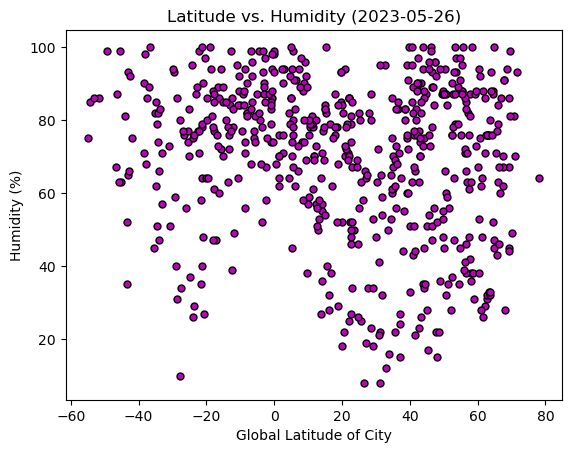

In [9]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"].astype("float")
y_values = city_data_df["Humidity"].astype("float")
plt.scatter(x_values,y_values, c='m', s=25, edgecolors='0.0')

# Incorporate the other graph properties
plt.xlabel('Global Latitude of City')
plt.ylabel('Humidity (%)')
plt.title(f'Latitude vs. Humidity ({date})')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

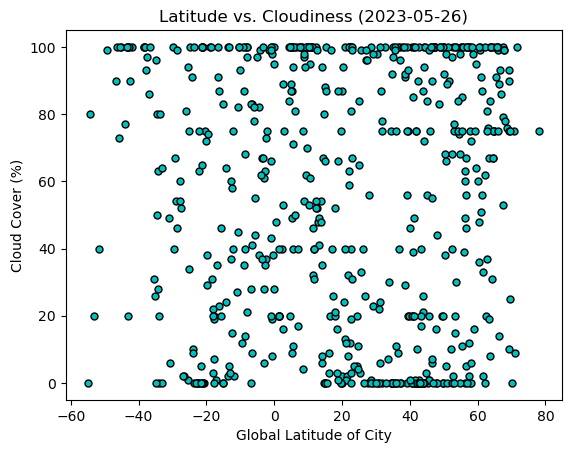

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"].astype("float")
y_values = city_data_df["Cloudiness"].astype("float")
plt.scatter(x_values,y_values, c='c', s=25, edgecolors='0.0')

# Incorporate the other graph properties
plt.xlabel('Global Latitude of City')
plt.ylabel('Cloud Cover (%)')
plt.title(f'Latitude vs. Cloudiness ({date})')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

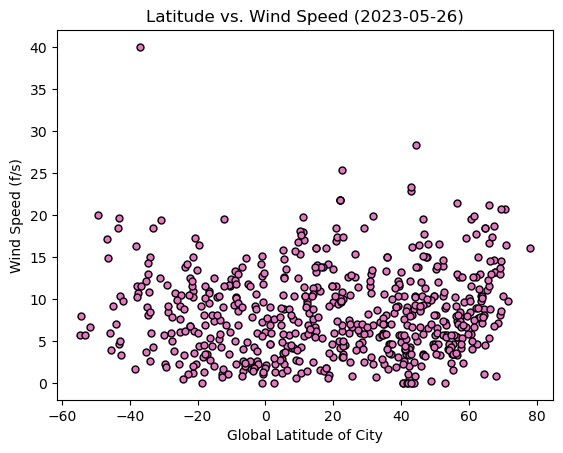

In [11]:
# Build the scatter plots for latitude vs. Wind Speed
x_values = city_data_df["Lat"].astype("float")
y_values = city_data_df["Wind Speed"].astype("float")
plt.scatter(x_values,y_values, c='C6', s=25, edgecolors='0.0')

# Incorporate the other graph properties
plt.xlabel('Global Latitude of City')
plt.ylabel('Wind Speed (f/s)')
plt.title(f'Latitude vs. Wind Speed ({date})')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"]>=0),:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp (F),Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Xilin Hot,43.9667,116.0333,64.15,35,21,8.75,CN,1685078691
4,Rongelap,11.1635,166.8941,82.27,79,100,19.82,MH,1685078692
6,Qaqortoq,60.7167,-46.0333,33.17,92,99,5.82,GL,1685078693
9,College,64.8569,-147.8028,71.55,47,75,18.41,US,1685078693
12,Whitehorse,60.7161,-135.0538,50.77,75,100,19.57,CA,1685078694


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"]<0),:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp (F),Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,Tolanaro,-25.0319,46.9987,69.87,83,75,9.22,MG,1685078692
2,Margaret River,-33.9500,115.0667,59.74,47,0,2.57,AU,1685078692
3,Papatowai,-46.5619,169.4708,57.65,67,90,17.20,NZ,1685078692
5,Fale Old Settlement,-9.3852,-171.2468,82.22,77,12,9.31,TK,1685078693
7,Lebu,-37.6167,-73.6500,53.85,86,97,10.76,CL,1685078693


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.6222174742933191


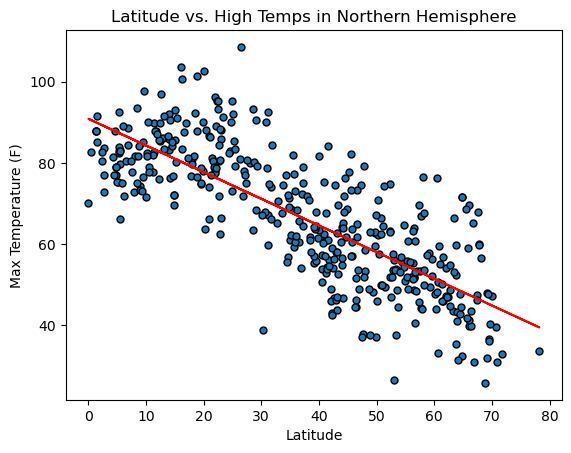

In [15]:
# Linear regression on Northern Hemisphere
# Build scatter plot for latitude vs. temperature
x_values = northern_hemi_df["Lat"].astype("float")
y_values = northern_hemi_df["Max Temp (F)"].astype("float")
plt.scatter(x_values,y_values, c='C0', s=25, edgecolors='0.0')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title("Latitude vs. High Temps in Northern Hemisphere")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Print r square value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()


The r-value is: 0.6015539932787187


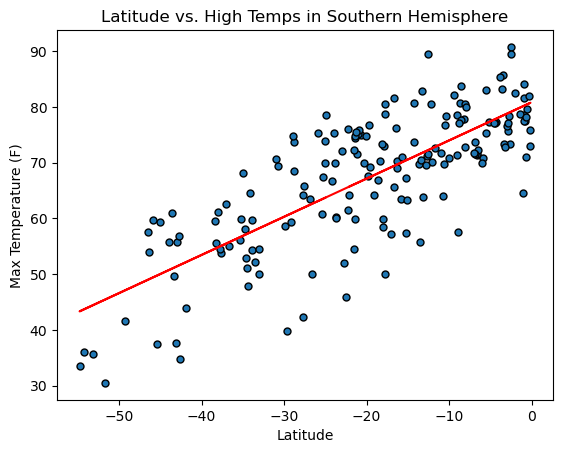

In [16]:
# Linear regression on Southern Hemisphere
# Build scatter plot for latitude vs. temperature
x_values = southern_hemi_df["Lat"].astype("float")
y_values = southern_hemi_df["Max Temp (F)"].astype("float")
plt.scatter(x_values,y_values, c='C0', s=25, edgecolors='0.0')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title("Latitude vs. High Temps in Southern Hemisphere")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Print r square value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()


**Discussion about the linear relationship:**

Based upon the analysis of both charts we can see there is a strong relationship between latitude and temperature. As the latitude nears the equator (0°) there is a corresponding increase in temperature.  This supports the hypothesis that equatorial regions are warmer than those that are closer to the poles.  This correlation is also supported by a high r-value in the 0.6 range.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.002076982663108074


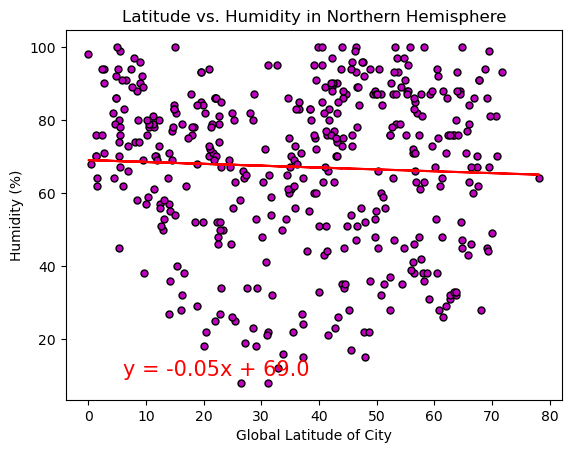

In [17]:
# Northern Hemisphere
# Build the scatter plots for latitude vs. humidity
x_values = northern_hemi_df["Lat"].astype("float")
y_values = northern_hemi_df["Humidity"].astype("float")
plt.scatter(x_values,y_values, c='m', s=25, edgecolors='0.0')

# Incorporate the other graph properties
plt.xlabel('Global Latitude of City')
plt.ylabel('Humidity (%)')
plt.title("Latitude vs. Humidity in Northern Hemisphere")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Print r square value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.036802694363543144


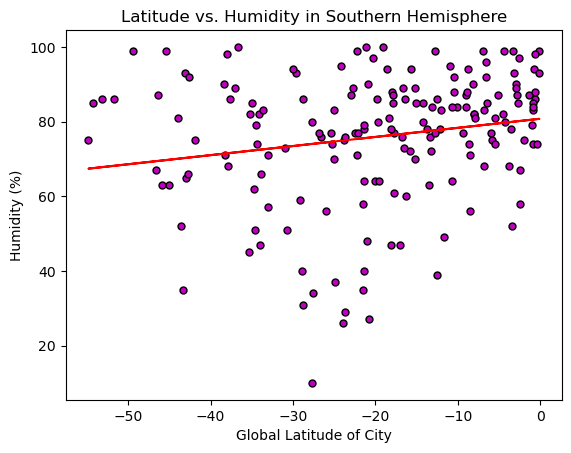

In [18]:
# Southern Hemisphere
# Build the scatter plots for latitude vs. humidity
x_values = southern_hemi_df["Lat"].astype("float")
y_values = southern_hemi_df["Humidity"].astype("float")
plt.scatter(x_values,y_values, c='m', s=25, edgecolors='0.0')

# Incorporate the other graph properties
plt.xlabel('Global Latitude of City')
plt.ylabel('Humidity (%)')
plt.title("Latitude vs. Humidity in Southern Hemisphere")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Print r square value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:**

Based upon the analysis of both charts we can see there is essentially no correlation between humidity and latitude. The linear regression is flat and humidity is relatively consistent at all latitudes, North and South. This is supported by low r-values in both charts.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.002714070435859235


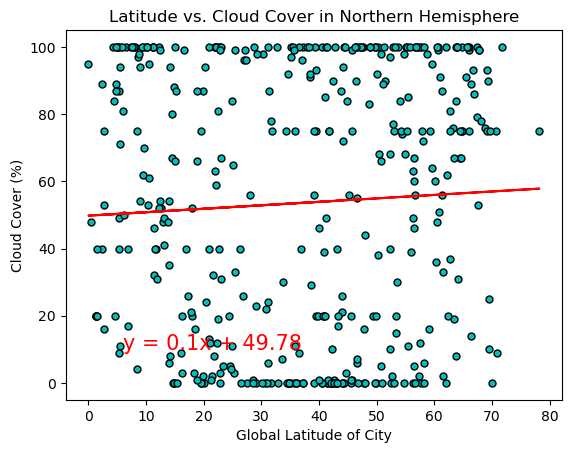

In [19]:
# Northern Hemisphere
# Build the scatter plots for latitude vs. cloudiness
x_values = northern_hemi_df["Lat"].astype("float")
y_values = northern_hemi_df["Cloudiness"].astype("float")
plt.scatter(x_values,y_values, c='c', s=25, edgecolors='0.0')

# Incorporate the other graph properties
plt.xlabel('Global Latitude of City')
plt.ylabel('Cloud Cover (%)')
plt.title("Latitude vs. Cloud Cover in Northern Hemisphere")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Print r square value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.007534945464639784


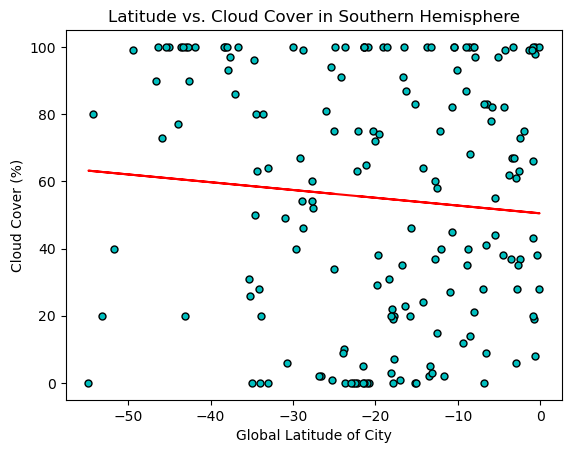

In [20]:
# Southern Hemisphere
# Build the scatter plots for latitude vs. cloudiness
x_values = southern_hemi_df["Lat"].astype("float")
y_values = southern_hemi_df["Cloudiness"].astype("float")
plt.scatter(x_values,y_values, c='c', s=25, edgecolors='0.0')

# Incorporate the other graph properties
plt.xlabel('Global Latitude of City')
plt.ylabel('Cloud Cover (%)')
plt.title("Latitude vs. Cloud Cover in Southern Hemisphere")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Print r square value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** 

Similarly, a comparison of cloud cover and latitude show that there is essentially no relationship between the two.  Cloud cover occurs at all latitudes with coverages ranging from zero to 100.  With an r-value hovering close to zero, the linear regression is flat.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.013317961574126192


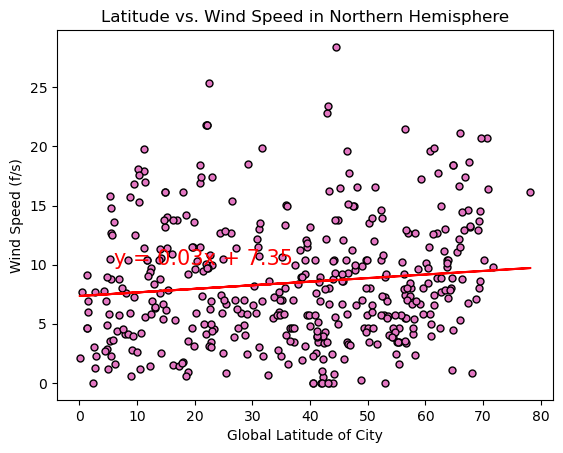

In [21]:
# Northern Hemisphere
# Build the scatter plots for latitude vs. Wind Speed
x_values = northern_hemi_df["Lat"].astype("float")
y_values = northern_hemi_df["Wind Speed"].astype("float")
plt.scatter(x_values,y_values, c='C6', s=25, edgecolors='0.0')

# Incorporate the other graph properties
plt.xlabel('Global Latitude of City')
plt.ylabel('Wind Speed (f/s)')
plt.title("Latitude vs. Wind Speed in Northern Hemisphere")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Print r square value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.05636951561148503


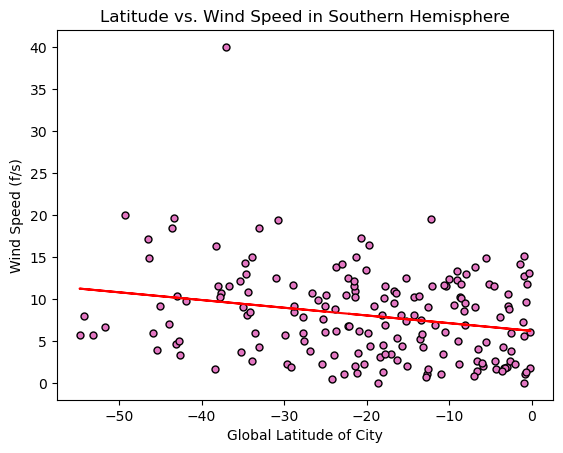

In [22]:
# Southern Hemisphere
# Build the scatter plots for latitude vs. Wind Speed
x_values = southern_hemi_df["Lat"].astype("float")
y_values = southern_hemi_df["Wind Speed"].astype("float")
plt.scatter(x_values,y_values, c='C6', s=25, edgecolors='0.0')

# Incorporate the other graph properties
plt.xlabel('Global Latitude of City')
plt.ylabel('Wind Speed (f/s)')
plt.title("Latitude vs. Wind Speed in Southern Hemisphere")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Print r square value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:**

The relationship between wind speed and latitude is somewhat more complicated than in the previous examples.  In the Northern hemisphere, linear regression is flat and there appears to be no correlation between the two.  However, wind speed in the Southern hemisphere shows a slight decrease as it moves toward the equator. With a difference of only 7-8 f/s and LOW r-value, any correlation that we might see is extremely weak at best.